In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    """
    :param x: np.array(np.float) вектор длины 2
    :return: np.float
    """
    return np.sum(np.sin(x)**2)

In [3]:
def grad_f(x):
    """
    Градиент функциии f, определенной выше.
    :param x: np.array[2]: float вектор длины 2
    :return: np.array[2]: float вектор длины 2
    """
    return np.sin(2 * x)

In [4]:
def grad_descent_2d(f, grad_f, lr, num_iter=100, x0=None):
    """
    функция, которая реализует градиентный спуск в минимум для функции f от двух переменных. 
        :param f: скалярная функция двух переменных
        :param grad_f: градиент функции f (вектор размерности 2)
        :param lr: learning rate алгоритма
        :param num_iter: количество итераций градиентного спуска
        :return: np.array[num_iter, 2] пар вида (x, f(x))
    """
    if x0 is None:
        x0 = np.random.random(2)
        
    # будем сохранять значения аргументов и значений функции 
    # в процессе град. спуска в переменную history
    history = []
    
    # итерация цикла -- шаг градиентнго спуска
    curr_x = x0.copy()
    for iter_num in range(num_iter):
        entry = np.hstack((curr_x, f(curr_x)))
        history.append(entry)
        
        curr_x -= lr * grad_f(curr_x)
        
    return np.vstack(history)

In [5]:
steps = grad_descent_2d(f, grad_f, lr=0.1, num_iter=20)

In [6]:
steps

array([[9.25762227e-01, 6.20340220e-01, 9.76451343e-01],
       [8.29676831e-01, 5.25739742e-01, 7.96077232e-01],
       [7.30068695e-01, 4.38923899e-01, 6.25379158e-01],
       [6.30680340e-01, 3.61987317e-01, 4.73149941e-01],
       [5.35429783e-01, 2.95750557e-01, 3.45262688e-01],
       [4.47668495e-01, 2.39989783e-01, 2.43869892e-01],
       [3.69626512e-01, 1.93813678e-01, 1.67609731e-01],
       [3.02252901e-01, 1.56014391e-01, 1.12752105e-01],
       [2.45417348e-01, 1.25315383e-01, 7.46520518e-02],
       [1.98281128e-01, 1.00513876e-01, 4.88719266e-02],
       [1.59656160e-01, 8.05462271e-02, 3.17479195e-02],
       [1.28264789e-01, 6.45065659e-02, 2.05171612e-02],
       [1.02892266e-01, 5.16410120e-02, 1.32139352e-02],
       [8.24587457e-02, 4.13311620e-02, 8.49134033e-03],
       [6.60416514e-02, 3.30743403e-02, 5.44867568e-03],
       [5.28716931e-02, 2.64642952e-02, 3.49300755e-03],
       [4.23170499e-02, 2.11739071e-02, 2.23793140e-03],
       [3.38637401e-02, 1.69403

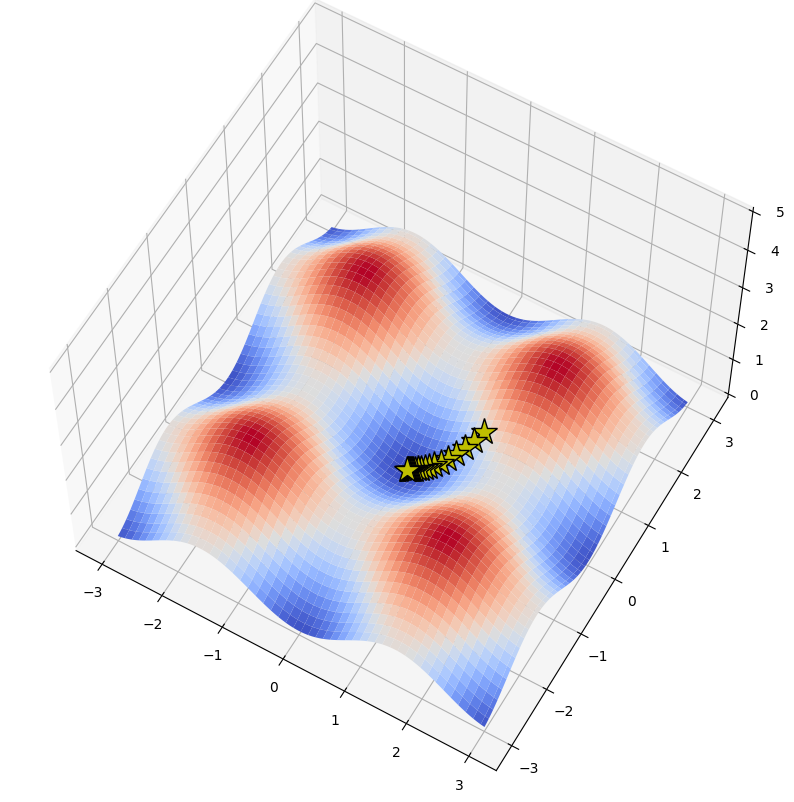

In [7]:
from matplotlib import cm

path = []

X, Y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(projection='3d')

zs = np.array([f(np.array([x,y]))
              for x, y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)


ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, zorder=2)

ax.plot(xs=steps[:, 0], ys=steps[:, 1], zs=steps[:, 2],
        marker='*', markersize=20, zorder=3, 
        markerfacecolor='y', lw=3, c='black')

ax.set_zlim(0, 5)
ax.view_init(elev=60)
plt.show()

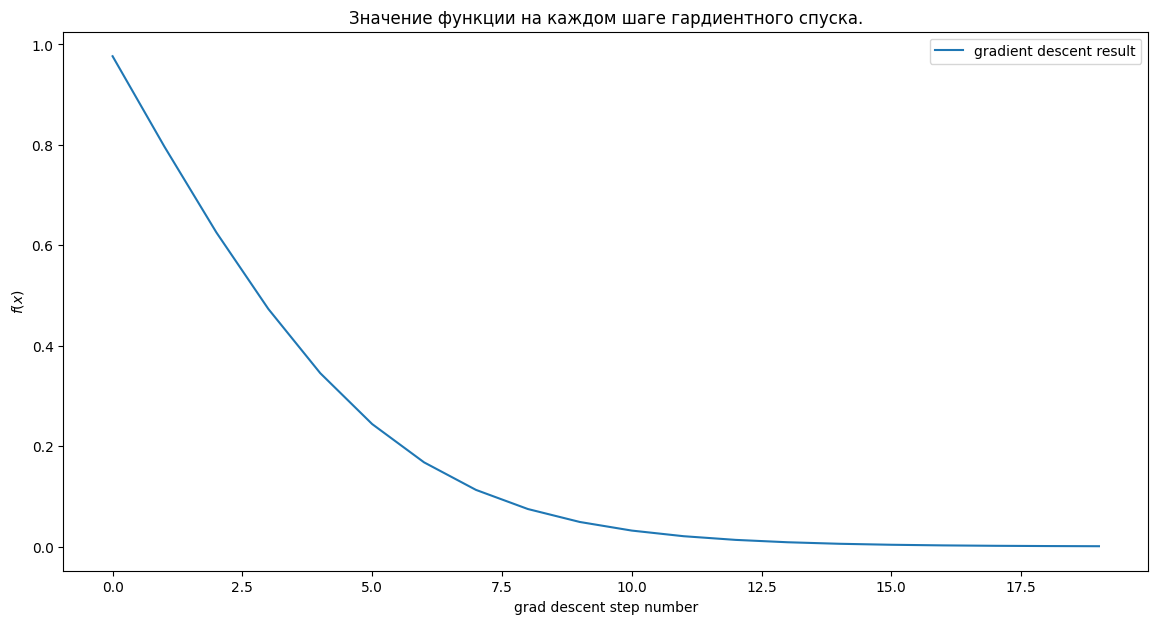

In [8]:
plt.figure(figsize=(14,7))
plt.xlabel('grad descent step number')
plt.ylabel('$f(x)$')
plt.title('Значение функции на каждом шаге гардиентного спуска.')

f_values = list(map(lambda x: x[2], steps))
plt.plot(f_values, label='gradient descent result')
plt.legend()